# Predicting car prices

Источник данных: https://www.kaggle.com/code/kusayinzhumabek/cars-price-prediction

### Прогнозирование цены автомобиля в бизнесе предполагает использование данных для оценки стоимости автомобиля и имеет несколько ценных применений в различных отраслях:
1. Дилерские центры подержанных автомобилей. Во-первых, оптимизация цен: установление конкурентоспособных цен на подержанные автомобили на основе рыночных тенденций, пробега, возраста, марки и т. д.
Во-вторых, управление запасами: Выявление недооцененных или переоцененных автомобилей для покупки/продажи в нужное время.
В-третьих, доверие клиентов: автоматизированная оценка цен повышает прозрачность и доверие покупателей.
3. Платформы для покупки/продажи автомобилей (например, Carvana, AutoTrader)
Мгновенные оценки: предоставляют пользователям котировки в реальном времени для продажи или обмена их автомобилей.
Персонализация: рекомендовать автомобили в рамках бюджета пользователя, прогнозируя стоимость перепродажи и амортизацию.
Обнаружение мошенничества: отмечайте подозрительные объявления с ценами, выходящими за пределы прогнозируемых диапазонов.
4. Страховые компании
Точная оценка: прогнозирование стоимости автомобиля для расчета страховых премий и выплат.
Моделирование амортизации: оценивайте, как падает стоимость автомобиля со временем, для долгосрочного планирования страхования.
5. Финансовые учреждения и лизинговые компании
Одобрение кредитов: прогнозирование стоимости автомобиля для принятия решения о сумме кредита и коэффициенте LTV (кредит к стоимости).
Оценка остаточной стоимости: оценка стоимости автомобиля в конце срока лизинга для определения справедливых условий лизинга.
Анализ и прогнозирование рынка
Мониторинг тенденций: понимание того, как рыночные факторы (цены на топливо, процентные ставки, внедрение EV) влияют на цены автомобилей.
Прогнозирование спроса: определите, какие модели или марки автомобилей, скорее всего, будут пользоваться спросом. 


## Expoloratory Data Analysis

In [359]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [361]:
data = pd.read_csv('clean_kolesa_dataset.csv')
data.head()

,Бренд,Модель,Год,Город,Кузов,"Объем двигателя, л",Пробег,Коробка передач,Руль,Цвет,Привод,Растаможен в Казахстане,Цена,Средння цена,Ссылка,Вид топлива
0,Nissan,Primera,1995,Шымкент,седан,1.6,319214.0,механика,слева,серебристый,передний привод,Да,881000.0,993000.0,https://kolesa.kz/a/show/112711467,бензин
1,Mitsubishi,L200,2020,Алматы,пикап,2.4,140000.0,механика,слева,белый,полный привод,Да,14490000.0,NaN,https://kolesa.kz/a/show/112530869,дизель
2,ВАЗ (Lada),2115 (седан),2007,Актобе,седан,1.5,140000.0,механика,слева,зеленый,передний привод,Нет,750000.0,982000.0,https://kolesa.kz/a/show/112633046,бензин
3,Porsche,Cayenne Coupe,2020,Нур-Султан (Астана),кроссовер,3.0,140000.0,автомат,слева,белый,полный привод,Да,56062500.0,NaN,https://kolesa.kz/a/show/112082674,бензин
4,JAC,T6,2020,Костанай,пикап,2.0,140000.0,механика,слева,белый,полный привод,Да,7550000.0,NaN,https://kolesa.kz/a/show/111227748,дизель


In [362]:
data.shape

(19985, 16)

In [363]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19985 entries, 0 to 19984
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Бренд                    19985 non-null  object 
 1   Модель                   19950 non-null  object 
 2   Год                      19985 non-null  int64  
 3   Город                    19985 non-null  object 
 4   Кузов                    19985 non-null  object 
 5   Объем двигателя, л       19971 non-null  float64
 6   Пробег                   19985 non-null  float64
 7   Коробка передач          19985 non-null  object 
 8   Руль                     19985 non-null  object 
 9   Цвет                     19985 non-null  object 
 10  Привод                   17740 non-null  object 
 11  Растаможен в Казахстане  19985 non-null  object 
 12  Цена                     19985 non-null  float64
 13  Средння цена             18806 non-null  float64
 14  Ссылка                

In [366]:
data = data.drop('Ссылка', axis=1)
data = data.drop('Средння цена', axis=1)

In [368]:
data.rename(columns={
    'Бренд': 'Brand',
    'Модель': 'Model',
    'Год': 'Year',
    'Город': 'City',
    'Кузов': 'Body',
    'Объем двигателя, л': 'EngineSize',
    'Пробег': 'Mileage',
    'Коробка передач': 'Transmission',
    'Руль': 'Wheel',
    'Цвет': 'Color',
    'Привод': 'Drive',
    'Растаможен в Казахстане': 'CustomsCleared',
    'Цена': 'Price',
    'Вид топлива': 'FuelType'
}, inplace=True)

In [369]:
data.describe()

,Year,EngineSize,Mileage,Price
count,19985.000000,19971.000000,1.998500e+04,1.998500e+04
mean,2005.607005,2.345613,1.891186e+05,5.094486e+06
std,8.811480,0.977421,4.410777e+05,7.473012e+06
min,1954.000000,0.200000,1.000000e+00,1.000000e+04
25%,1998.000000,1.600000,1.120000e+05,1.400000e+06
50%,2007.000000,2.000000,1.400000e+05,2.980000e+06
75%,2013.000000,2.700000,1.700000e+05,5.700000e+06
max,2020.000000,9.000000,9.999999e+06,2.800000e+08


In [370]:
data.isnull().sum()

Brand                0
Model               35
Year                 0
City                 0
Body                 0
EngineSize          14
Mileage              0
Transmission         0
Wheel                0
Color                0
Drive             2245
CustomsCleared       0
Price                0
FuelType            14
dtype: int64

In [372]:
data['Drive'] = data['Drive'].fillna('Unknown')

In [374]:
data.isnull().sum()

Brand              0
Model             35
Year               0
City               0
Body               0
EngineSize        14
Mileage            0
Transmission       0
Wheel              0
Color              0
Drive              0
CustomsCleared     0
Price              0
FuelType          14
dtype: int64

In [377]:
data = data.dropna()

In [378]:
data.duplicated().sum()

1517

In [380]:
data = data.drop_duplicates()

In [382]:
data.nunique()

Brand               86
Model             1002
Year                62
City               230
Body                18
EngineSize          81
Mileage           2727
Transmission         5
Wheel                2
Color               42
Drive                4
CustomsCleared       2
Price             1330
FuelType             4
dtype: int64

In [385]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18419 entries, 0 to 19984
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brand           18419 non-null  object 
 1   Model           18419 non-null  object 
 2   Year            18419 non-null  int64  
 3   City            18419 non-null  object 
 4   Body            18419 non-null  object 
 5   EngineSize      18419 non-null  float64
 6   Mileage         18419 non-null  float64
 7   Transmission    18419 non-null  object 
 8   Wheel           18419 non-null  object 
 9   Color           18419 non-null  object 
 10  Drive           18419 non-null  object 
 11  CustomsCleared  18419 non-null  object 
 12  Price           18419 non-null  float64
 13  FuelType        18419 non-null  object 
dtypes: float64(3), int64(1), object(10)
memory usage: 2.1+ MB


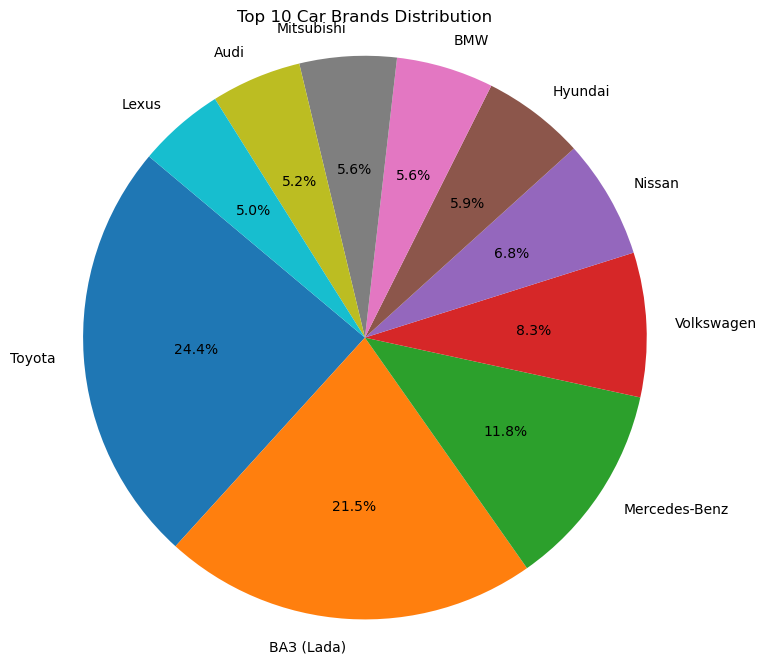

In [386]:
import matplotlib.pyplot as plt

# Top 10 brands only (optional)
top_brands = data['Brand'].value_counts().nlargest(10)

plt.figure(figsize=(8, 8))
plt.pie(top_brands, labels=top_brands.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Car Brands Distribution')
plt.axis('equal')  # Make it a circle
plt.show()

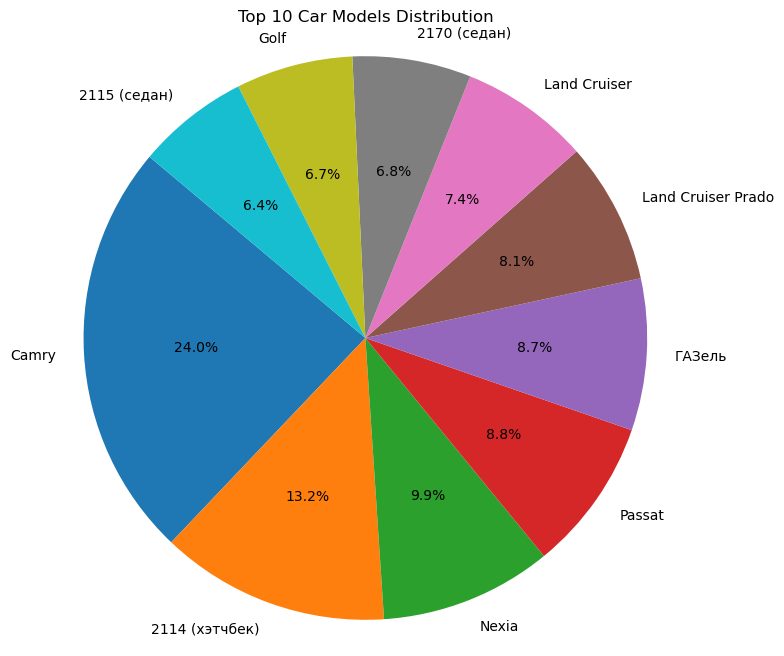

In [388]:
import matplotlib.pyplot as plt

# Top 10 brands only (optional)
top_brands = data['Model'].value_counts().nlargest(10)

plt.figure(figsize=(8, 8))
plt.pie(top_brands, labels=top_brands.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Car Models Distribution')
plt.axis('equal')  # Make it a circle
plt.show()

<Axes: xlabel='Price', ylabel='Count'>

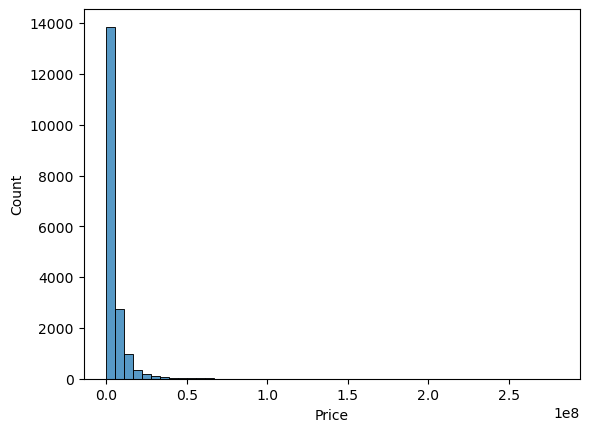

In [389]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(data['Price'], bins=50)


<Axes: >

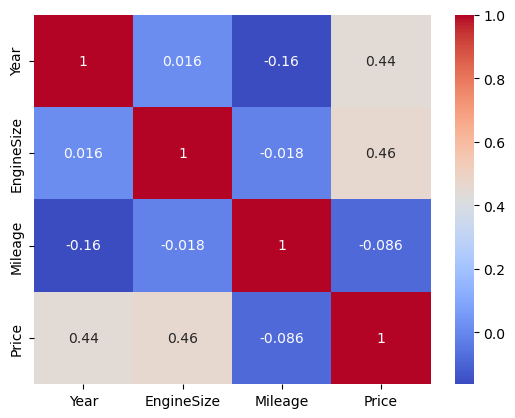

In [391]:
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm')

<Axes: xlabel='Mileage', ylabel='Price'>

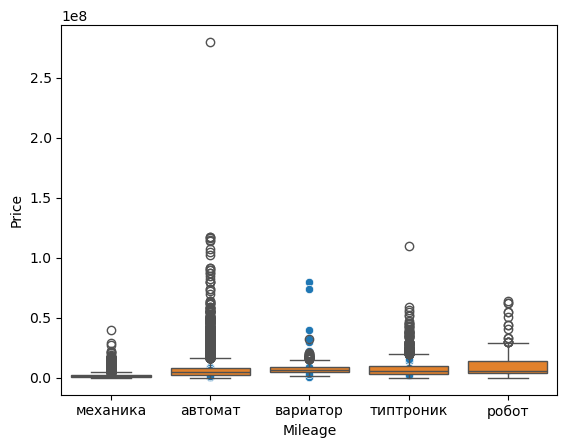

In [393]:
sns.scatterplot(data=data, x='Mileage', y='Price')
sns.boxplot(x='Transmission', y='Price', data=data)

In [395]:
data['CarAge'] = 2025 - data['Year']
data['MileagePerYear'] = data['Mileage'] / data['CarAge'].replace(0, 1)
data

,Brand,Model,Year,City,Body,EngineSize,Mileage,Transmission,Wheel,Color,Drive,CustomsCleared,Price,FuelType,CarAge,MileagePerYear
0,Nissan,Primera,1995,Шымкент,седан,1.6,319214.0,механика,слева,серебристый,передний привод,Да,881000.0,бензин,30,10640.466667
1,Mitsubishi,L200,2020,Алматы,пикап,2.4,140000.0,механика,слева,белый,полный привод,Да,14490000.0,дизель,5,28000.000000
2,ВАЗ (Lada),2115 (седан),2007,Актобе,седан,1.5,140000.0,механика,слева,зеленый,передний привод,Нет,750000.0,бензин,18,7777.777778
3,Porsche,Cayenne Coupe,2020,Нур-Султан (Астана),кроссовер,3.0,140000.0,автомат,слева,белый,полный привод,Да,56062500.0,бензин,5,28000.000000
4,JAC,T6,2020,Костанай,пикап,2.0,140000.0,механика,слева,белый,полный привод,Да,7550000.0,дизель,5,28000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19980,Mazda,626,1988,Жаркент,седан,2.0,140000.0,механика,слева,белый,Unknown,Да,300000.0,бензин,37,3783.783784
19981,ВАЗ (Lada),2114 (хэтчбек),2013,Актобе,хэтчбек,1.6,179000.0,механика,слева,черный металлик,передний привод,Да,1700000.0,газ,12,14916.666667
19982,ВАЗ (Lada),2109 (хэтчбек),2000,Петропавловск,хэтчбек,1.6,140000.0,механика,слева,белый,передний привод,Нет,370000.0,бензин,25,5600.000000
19983,ВАЗ (Lada),2114 (хэтчбек),2008,Шымкент,хэтчбек,1.5,140000.0,механика,слева,хамелеон,Unknown,Нет,900000.0,бензин,17,8235.294118


In [396]:
luxury_brands = ['BMW', 'Audi', 'Lexus', 'Mercedes-Benz', 'Porsche']  # Add or remove as needed

data['IsLuxuryBrand'] = data['Brand'].isin(luxury_brands).astype(int)

data

,Brand,Model,Year,City,Body,EngineSize,Mileage,Transmission,Wheel,Color,Drive,CustomsCleared,Price,FuelType,CarAge,MileagePerYear,IsLuxuryBrand
0,Nissan,Primera,1995,Шымкент,седан,1.6,319214.0,механика,слева,серебристый,передний привод,Да,881000.0,бензин,30,10640.466667,0
1,Mitsubishi,L200,2020,Алматы,пикап,2.4,140000.0,механика,слева,белый,полный привод,Да,14490000.0,дизель,5,28000.000000,0
2,ВАЗ (Lada),2115 (седан),2007,Актобе,седан,1.5,140000.0,механика,слева,зеленый,передний привод,Нет,750000.0,бензин,18,7777.777778,0
3,Porsche,Cayenne Coupe,2020,Нур-Султан (Астана),кроссовер,3.0,140000.0,автомат,слева,белый,полный привод,Да,56062500.0,бензин,5,28000.000000,1
4,JAC,T6,2020,Костанай,пикап,2.0,140000.0,механика,слева,белый,полный привод,Да,7550000.0,дизель,5,28000.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19980,Mazda,626,1988,Жаркент,седан,2.0,140000.0,механика,слева,белый,Unknown,Да,300000.0,бензин,37,3783.783784,0
19981,ВАЗ (Lada),2114 (хэтчбек),2013,Актобе,хэтчбек,1.6,179000.0,механика,слева,черный металлик,передний привод,Да,1700000.0,газ,12,14916.666667,0
19982,ВАЗ (Lada),2109 (хэтчбек),2000,Петропавловск,хэтчбек,1.6,140000.0,механика,слева,белый,передний привод,Нет,370000.0,бензин,25,5600.000000,0
19983,ВАЗ (Lada),2114 (хэтчбек),2008,Шымкент,хэтчбек,1.5,140000.0,механика,слева,хамелеон,Unknown,Нет,900000.0,бензин,17,8235.294118,0


## Modeling

In [400]:
# y is the target (price)
y = data['Price']

# X is the rest of the data (drop the target column)
X = data.drop('Price', axis=1)

In [401]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [403]:
print(X_train.columns.tolist())  # or X.columns.tolist() if not split

['Brand', 'Model', 'Year', 'City', 'Body', 'EngineSize', 'Mileage', 'Transmission', 'Wheel', 'Color', 'Drive', 'CustomsCleared', 'FuelType', 'CarAge', 'MileagePerYear', 'IsLuxuryBrand']


In [404]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from xgboost import XGBRegressor
import joblib

# Column types
num_cols = ['Year', 'EngineSize', 'Mileage']
low_card_cat = ['Body', 'Transmission', 'Wheel', 'Color', 'Drive', 'CustomsCleared', 'FuelType']
high_card_cat = ['Brand', 'Model', 'City']  # These should use OneHotEncoder or OrdinalEncoder

# Preprocessor
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat_low', OneHotEncoder(handle_unknown='ignore'), low_card_cat),
    ('cat_high', OneHotEncoder(handle_unknown='ignore'), high_card_cat)
])

## Linear Regression

In [406]:
from sklearn.linear_model import LinearRegression
# Step 3: Build pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

# Step 4: Train on training set
pipeline.fit(X_train, y_train)

# Step 5: Evaluate on test set
from sklearn.metrics import mean_absolute_error, r2_score
y_pred = pipeline.predict(X_test)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

MAE: 1748842.751578439
R²: 0.75304521366621


## XGB Boost

In [411]:
# Step 3: Build pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', XGBRegressor(n_estimators=100, learning_rate=0.1))
])

# Step 4: Train on training set
pipeline.fit(X_train, y_train)

# Step 5: Evaluate on test set
from sklearn.metrics import mean_absolute_error, r2_score
y_pred = pipeline.predict(X_test)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

MAE: 832505.8854166666
R²: 0.9515147454991468


## Save the best model

In [419]:
# Step 3: Build pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', XGBRegressor(n_estimators=100, learning_rate=0.1))
])

# Step 4: Retrain on the full dataset for deployment
pipeline.fit(X, y)

# Step 6: Save trained model
joblib.dump(pipeline, 'model_pipeline.pkl')

['model_pipeline.pkl']